# Data Understanding

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
csv_file = 'ObesityDataSet_raw_and_data_sinthetic.csv'
try:
    df = pd.read_csv(csv_file)
    print(f"Dataset '{csv_file}' berhasil dimuat.")
except FileNotFoundError:
    print(f"File {csv_file} tidak ditemukan.")
    raise

print("\nUkuran data:", df.shape)

Dataset 'ObesityDataSet_raw_and_data_sinthetic.csv' berhasil dimuat.

Ukuran data: (2111, 17)


In [ ]:
print("\nSepuluh baris pertama:")
df.head(10)


Sepuluh baris pertama:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [ ]:
print("Informasi struktur dataset:")
df.info()

Informasi struktur dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF   

In [ ]:
print("\nNilai unik pada beberapa kolom kategorikal:")
for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']:
    print(f"{col} -> {df[col].unique()}")


Nilai unik pada beberapa kolom kategorikal:
Gender -> ['Female' 'Male']
family_history_with_overweight -> ['yes' 'no']
FAVC -> ['no' 'yes']
CAEC -> ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE -> ['no' 'yes']
SCC -> ['no' 'yes']
CALC -> ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS -> ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad -> ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
# Cek missing values
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah missing values per kolom:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
# Cek duplikat
duplicates = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")


Jumlah data duplikat: 24


In [ ]:
# Deteksi outlier dengan IQR untuk kolom numerik
num_cols = df.select_dtypes(include=np.number).columns
outlier_info = {}
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    batas_bawah, batas_atas = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)].shape[0]
    outlier_info[col] = outliers

print("\nJumlah outlier per kolom numerik:")
print(outlier_info)



Jumlah outlier per kolom numerik:
{'Age': 168, 'Height': 1, 'Weight': 1, 'FCVC': 0, 'NCP': 579, 'CH2O': 0, 'FAF': 0, 'TUE': 0}


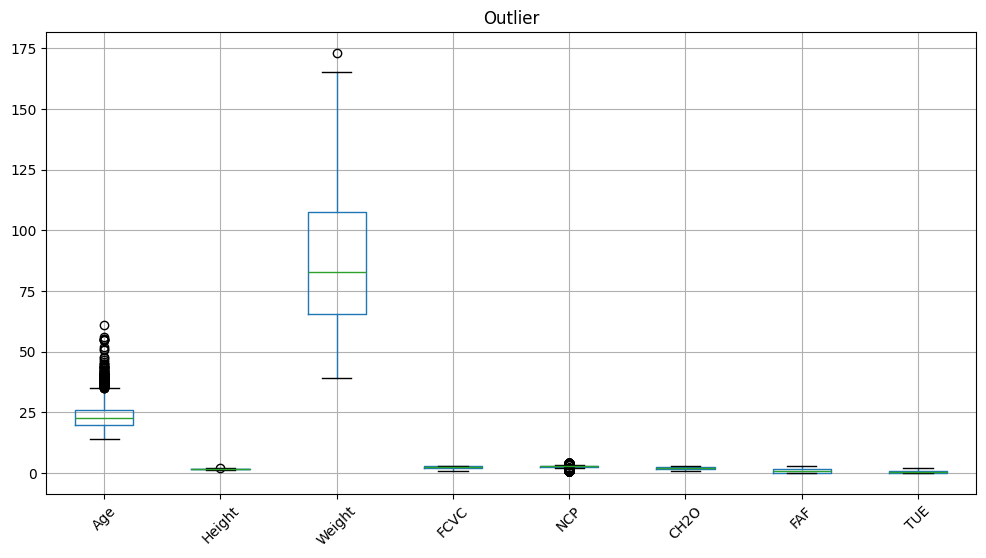

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.title('Outlier')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Statistik deskriptif untuk variabel numerik
desc = df.describe().T
desc[['mean', '50%', 'std', 'min', 'max']]

,mean,50%,std,min,max
Age,24.312600,22.777890,6.345968,14.00,61.00
Height,1.701677,1.700499,0.093305,1.45,1.98
Weight,86.586058,83.000000,26.191172,39.00,173.00
FCVC,2.419043,2.385502,0.533927,1.00,3.00
NCP,2.685628,3.000000,0.778039,1.00,4.00
CH2O,2.008011,2.000000,0.612953,1.00,3.00
FAF,1.010298,1.000000,0.850592,0.00,3.00
TUE,0.657866,0.625350,0.608927,0.00,2.00


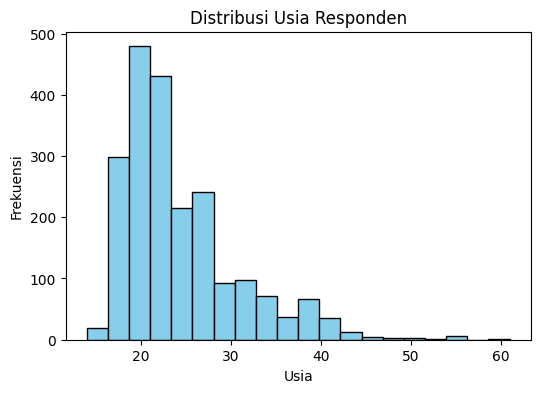

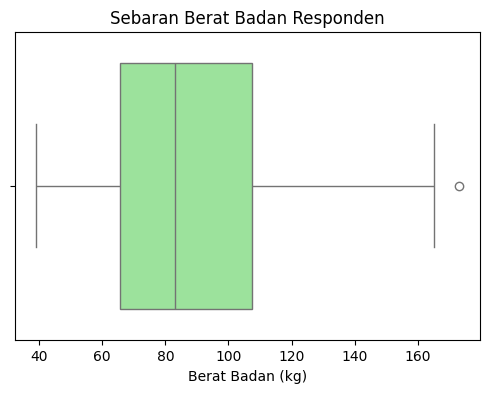

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Usia Responden')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Weight'], color='lightgreen')
plt.title('Sebaran Berat Badan Responden')
plt.xlabel('Berat Badan (kg)')
plt.show()



Distribusi frekuensi untuk Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64


/tmp/ipython-input-1587390701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='tab10')


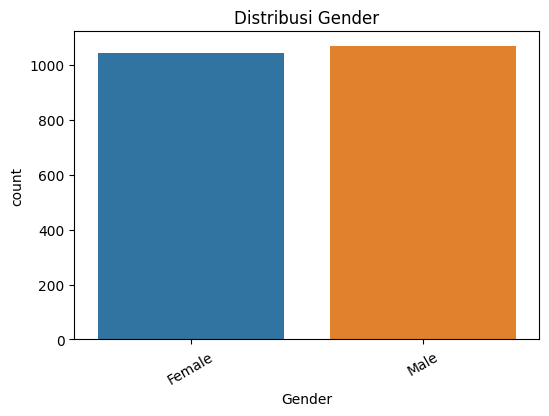


Distribusi frekuensi untuk family_history_with_overweight:
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


/tmp/ipython-input-1587390701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='tab10')


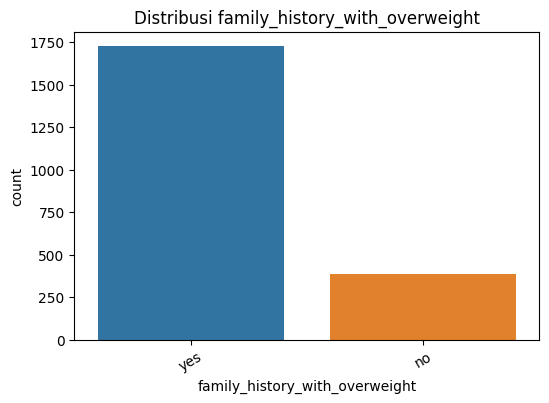


Distribusi frekuensi untuk FAVC:
FAVC
yes    1866
no      245
Name: count, dtype: int64


/tmp/ipython-input-1587390701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='tab10')


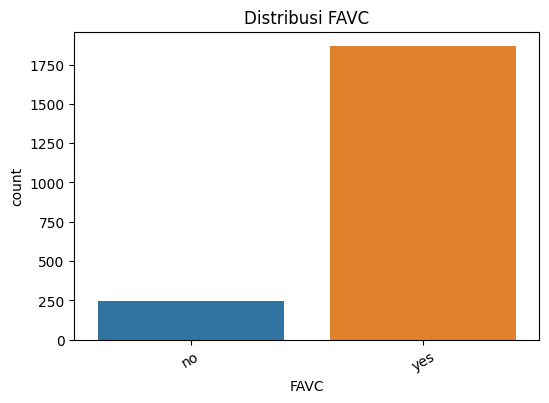


Distribusi frekuensi untuk CAEC:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


/tmp/ipython-input-1587390701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='tab10')


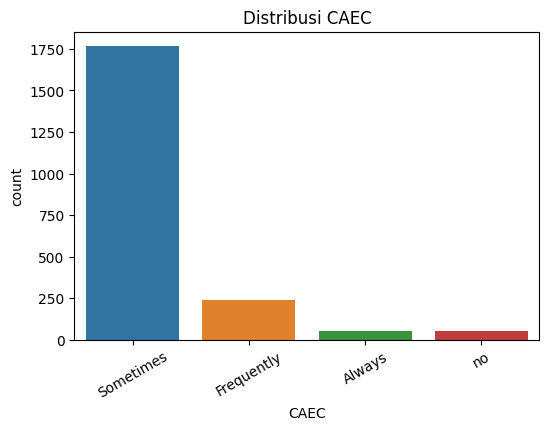


Distribusi frekuensi untuk NObeyesdad:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


/tmp/ipython-input-1587390701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='tab10')


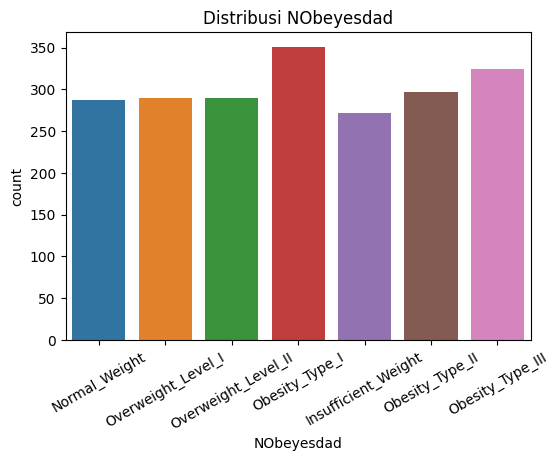

In [ ]:
# Frekuensi variabel kategorikal utama
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'NObeyesdad']
for col in cat_cols:
    print(f"\nDistribusi frekuensi untuk {col}:")
    print(df[col].value_counts())

    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='tab10')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=30)
    plt.show()

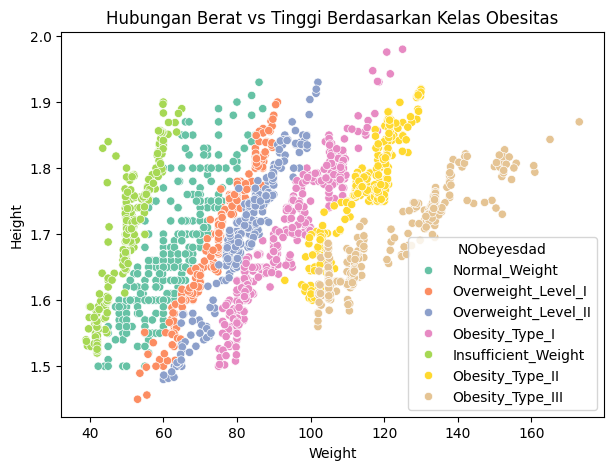

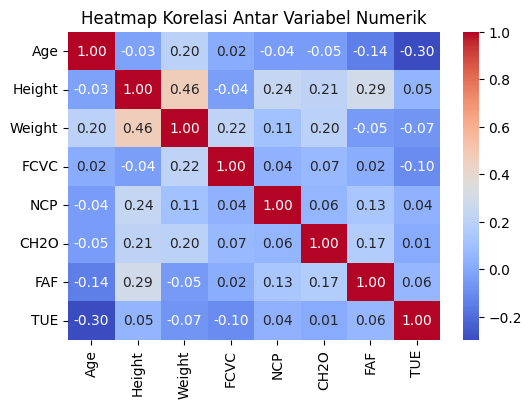

In [ ]:
# Scatter plot hubungan berat badan vs tinggi badan
plt.figure(figsize=(7,5))
sns.scatterplot(x='Weight', y='Height', hue='NObeyesdad', data=df, palette='Set2')
plt.title('Hubungan Berat vs Tinggi Berdasarkan Kelas Obesitas')
plt.show()

# Korelasi numerik
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

/tmp/ipython-input-2541553718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Weight', data=df, palette='husl')


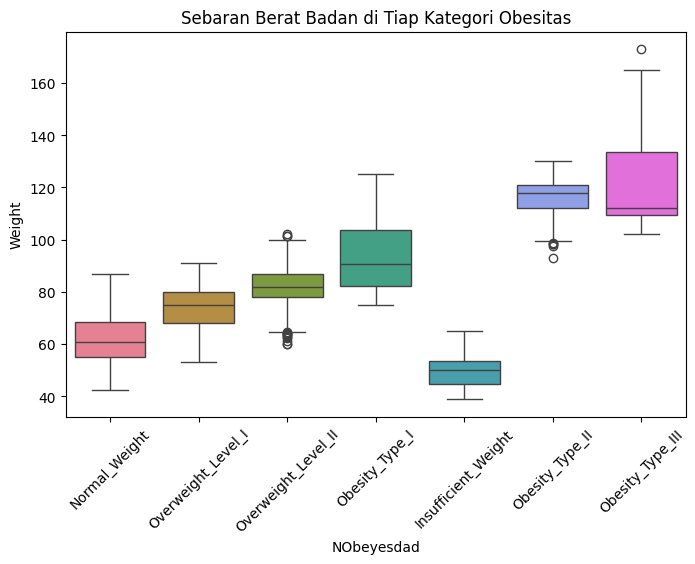

/tmp/ipython-input-2541553718.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family_history_with_overweight', y='FAF', data=df, palette='pastel', ci=None)
/tmp/ipython-input-2541553718.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='family_history_with_overweight', y='FAF', data=df, palette='pastel', ci=None)


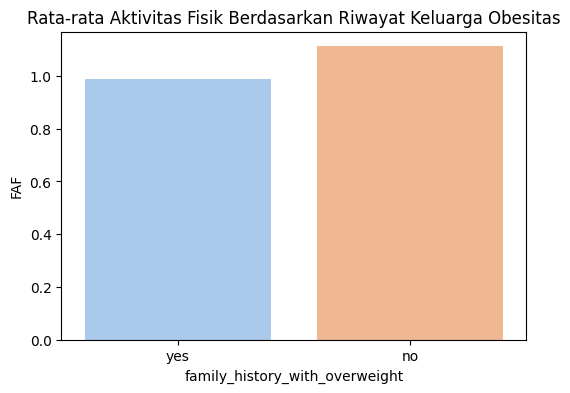

In [ ]:
# Boxplot perbandingan berat badan di tiap kategori obesitas
plt.figure(figsize=(8,5))
sns.boxplot(x='NObeyesdad', y='Weight', data=df, palette='husl')
plt.title('Sebaran Berat Badan di Tiap Kategori Obesitas')
plt.xticks(rotation=45)
plt.show()

# Rata-rata aktivitas fisik berdasarkan riwayat keluarga obesitas
plt.figure(figsize=(6,4))
sns.barplot(x='family_history_with_overweight', y='FAF', data=df, palette='pastel', ci=None)
plt.title('Rata-rata Aktivitas Fisik Berdasarkan Riwayat Keluarga Obesitas')
plt.show()

Proporsi konsumsi makanan tinggi kalori berdasarkan riwayat keluarga obesitas:
FAVC                                   no        yes
family_history_with_overweight                      
no                              25.714286  74.285714
yes                              8.458864  91.541136


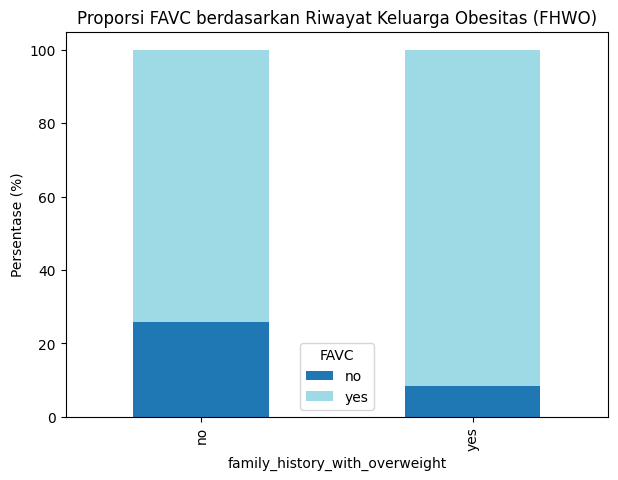

In [ ]:
# Crosstab antara FHWO dan FAVC
cross_tab = pd.crosstab(df['family_history_with_overweight'], df['FAVC'], normalize='index') * 100
print("Proporsi konsumsi makanan tinggi kalori berdasarkan riwayat keluarga obesitas:")
print(cross_tab)

# Visualisasi stacked bar
cross_tab.plot(kind='bar', stacked=True, colormap='tab20', figsize=(7,5))
plt.title('Proporsi FAVC berdasarkan Riwayat Keluarga Obesitas (FHWO)')
plt.ylabel('Persentase (%)')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Korelasi faktor dominan terhadap kelas obesitas
factors = ['Weight', 'family_history_with_overweight', 'FAF']
encoded = df.copy()
encoded['family_history_with_overweight'] = encoded['family_history_with_overweight'].map({'yes':1, 'no':0})
encoded['NObeyesdad_encoded'] = LabelEncoder().fit_transform(encoded['NObeyesdad'])

corr_factors = encoded[factors + ['NObeyesdad_encoded']].corr()
print("Korelasi faktor dominan terhadap tingkat obesitas:")
print(corr_factors['NObeyesdad_encoded'].sort_values(ascending=False))

Korelasi faktor dominan terhadap tingkat obesitas:
NObeyesdad_encoded                1.000000
Weight                            0.387643
family_history_with_overweight    0.313667
FAF                              -0.129564
Name: NObeyesdad_encoded, dtype: float64


# Data Preparation

In [ ]:
# Hapus duplikat data
if duplicates > 0:
  encoded = encoded.drop_duplicates()
  print("Data duplikat berhasil dihapus")
  print("Jumlah data duplikat setelah dibersihkan:", encoded.duplicated().sum())

Data duplikat berhasil dihapus
Jumlah data duplikat setelah dibersihkan: 0


In [ ]:
# Rekayasa fitur (BMI = Weight (kg) / (Height (m))^2)
encoded['BMI'] = encoded['Weight'] / (encoded['Height'] ** 2)

display(encoded.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_encoded,BMI
0,Female,21.0,1.62,64.0,1,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1,24.386526
1,Female,21.0,1.52,56.0,1,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,24.238227
2,Male,23.0,1.80,77.0,1,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,23.765432
3,Male,27.0,1.80,87.0,0,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,5,26.851852
4,Male,22.0,1.78,89.8,0,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,6,28.342381


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 75% untuk dilatih dan 25% untuk diuji

X = encoded[['Weight', 'family_history_with_overweight', 'FAF']]
y = encoded['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Ukuran data training untuk fitur (X_train): {X_train.shape}")
print(f"Ukuran data training untuk target (y_train): {y_train.shape}")
print(f"Ukuran data testing untuk fitur (X_test): {X_test.shape}")
print(f"Ukuran data testing untuk target (y_test): {y_test.shape}")

Ukuran data training untuk fitur (X_train): (1565, 3)
Ukuran data training untuk target (y_train): (1565,)
Ukuran data testing untuk fitur (X_test): (522, 3)
Ukuran data testing untuk target (y_test): (522,)


# Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modeling Decision Tree Classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report Decision Tree:\n")
print(classification_report(y_test, y_pred_dt))

Akurasi Decision Tree: 0.7413793103448276

Classification Report Decision Tree:

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.80      0.86        74
      Normal_Weight       0.68      0.80      0.73        76
     Obesity_Type_I       0.70      0.71      0.70        85
    Obesity_Type_II       0.81      0.78      0.80        82
   Obesity_Type_III       0.85      0.83      0.84        77
 Overweight_Level_I       0.77      0.66      0.71        71
Overweight_Level_II       0.48      0.56      0.52        57

           accuracy                           0.74       522
          macro avg       0.74      0.73      0.74       522
       weighted avg       0.75      0.74      0.74       522



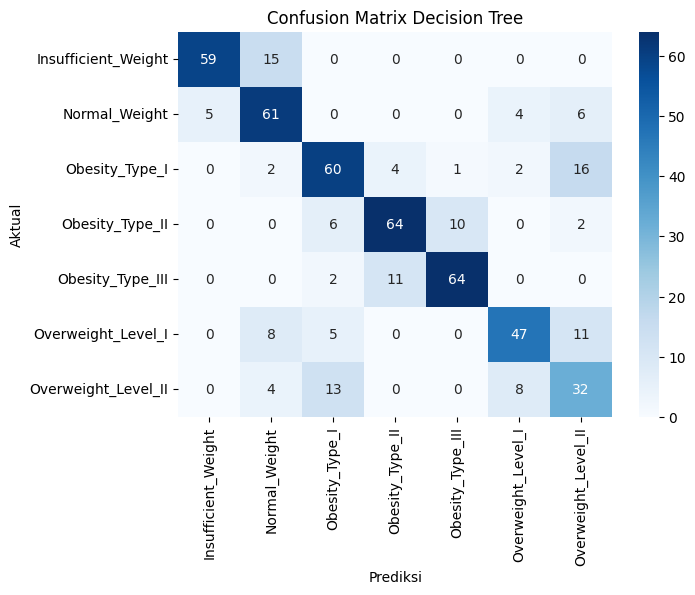

In [ ]:
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(7,5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=dt_model.classes_,
            yticklabels=dt_model.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Decision Tree")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Perbandingan model

hasil_dt = {}

for md in [2, 4, 6, None]:
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    hasil_dt[md] = accuracy_score(y_test, pred)

hasil_dt


{2: 0.446360153256705,
 4: 0.6819923371647509,
 6: 0.7318007662835249,
 None: 0.7413793103448276}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modeling Random Forest Classifier

rf_model = RandomForestClassifier(
    n_estimators = 150,
    max_features = "sqrt",
    bootstrap = True,
    oob_score = True,
    random_state = 42,
    criterion = "gini"
)

rf_model.fit(X_train, y_train)

print("Skor Out-Of-Bag Random Forest:", rf_model.oob_score_)


Skor Out-Of-Bag Random Forest: 0.7322683706070288


In [ ]:
# Prediksi dan Classification Report

y_pred_rf = rf_model.predict(X_test)

print("Classification Report Random Forest:\n")
print(classification_report(y_test, y_pred_rf))


Classification Report Random Forest:

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.82      0.87        74
      Normal_Weight       0.73      0.80      0.77        76
     Obesity_Type_I       0.75      0.66      0.70        85
    Obesity_Type_II       0.91      0.82      0.86        82
   Obesity_Type_III       0.85      0.96      0.90        77
 Overweight_Level_I       0.80      0.72      0.76        71
Overweight_Level_II       0.44      0.56      0.49        57

           accuracy                           0.77       522
          macro avg       0.77      0.76      0.76       522
       weighted avg       0.78      0.77      0.77       522



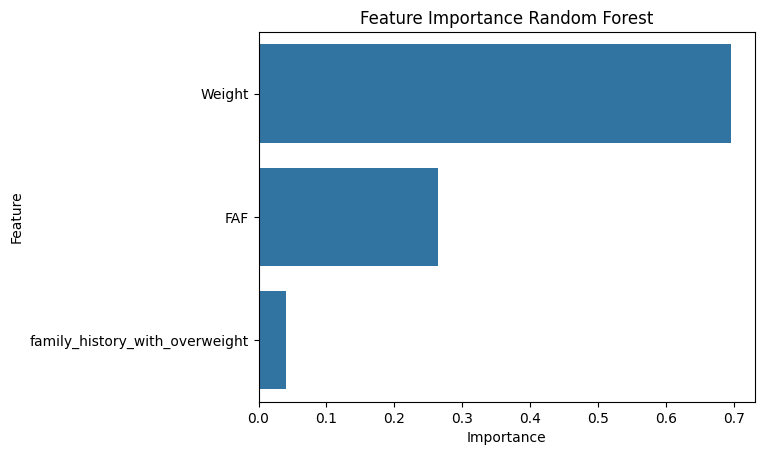

In [ ]:
# Feature Importance

importance = rf_model.feature_importances_

fi_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
}).sort_values('importance', ascending=False)

sns.barplot(data=fi_df, x='importance', y='feature')
plt.title("Feature Importance Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Contoh sample

sample = pd.DataFrame([[
    80,  # Weight
    1,   # family_history_with_overweight
    2    # FAF
]], columns=X.columns)

pred_proba = rf_model.predict_proba(sample)

print(sample)
print(pd.DataFrame(pred_proba, columns=rf_model.classes_))


   Weight  family_history_with_overweight  FAF
0      80                               1    2
   Insufficient_Weight  Normal_Weight  Obesity_Type_I  Obesity_Type_II  \
0                  0.0       0.028333        0.026667              0.0   

   Obesity_Type_III  Overweight_Level_I  Overweight_Level_II  
0               0.0            0.448222             0.496778  


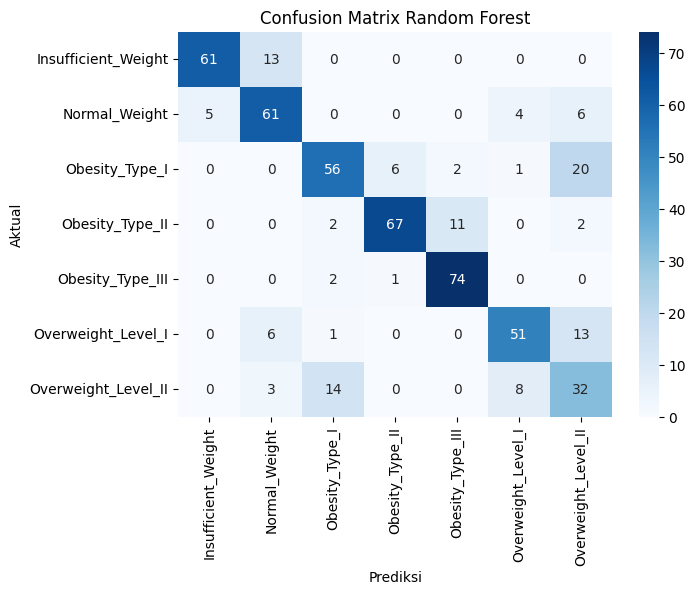

In [ ]:
# Visualisasi Confusion Matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Random Forest")
plt.show()
